Mean Squared Error: 1.0
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1}


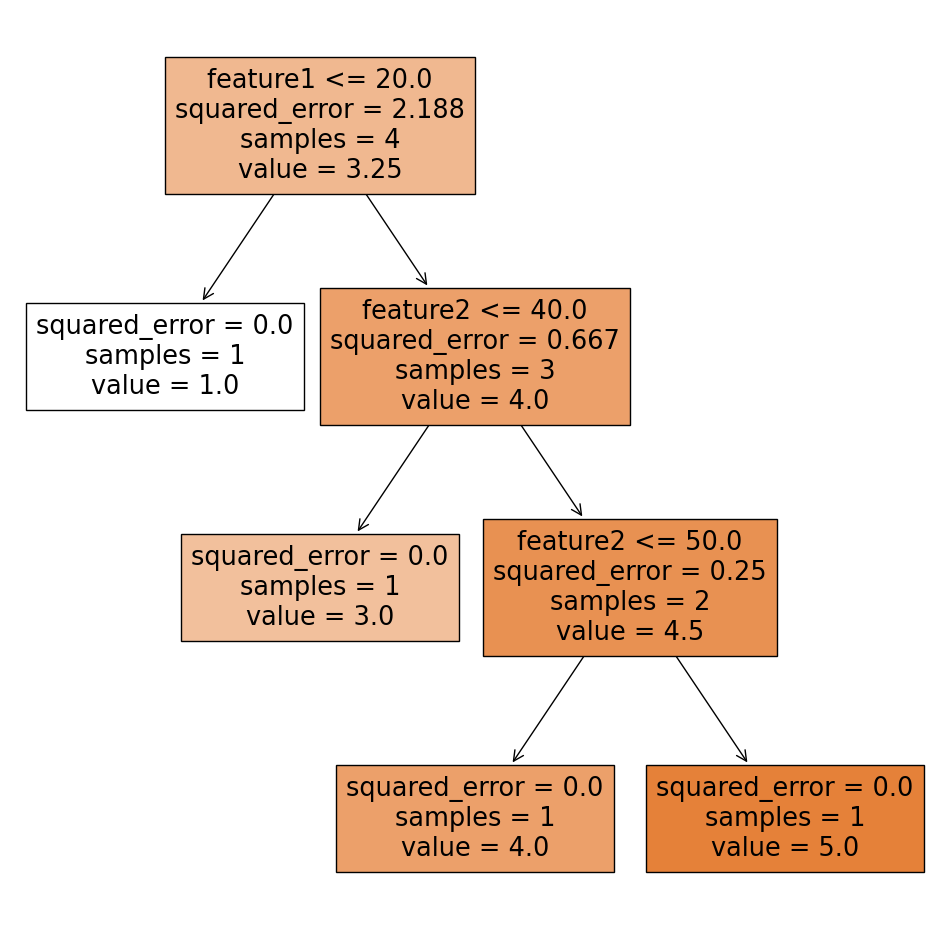

In [2]:
#EXAMPLE
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Example data
data = {
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [15, 25, 35, 45, 55],
    'target': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Splitting features and target
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predicting
y_pred = tree_regressor.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Tuning the model
parameters = {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(tree_regressor, parameters, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

# Visualizing the tree
plt.figure(figsize=(12,12))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()


In [5]:
#COMBINE DATA
import pandas as pd

def drop_last_section(trial):
    return '_'.join(trial.split('_')[:-1])

propertyData = pd.read_csv('property_data.csv')
propertyData.reset_index()
allData = pd.read_csv('allDataCopy_Humidity.csv')
allData.reset_index


propertyData['Modified_Trial'] = propertyData['Trial'].apply(drop_last_section)
combinedData = pd.merge(allData, propertyData, left_on='Sample', right_on='Modified_Trial', how='inner')
combinedData.drop(columns=['Modified_Trial'], inplace=True)
combinedData.drop(columns=['Thickness_x'], inplace=True)

combinedData.to_csv('combinedData.csv')

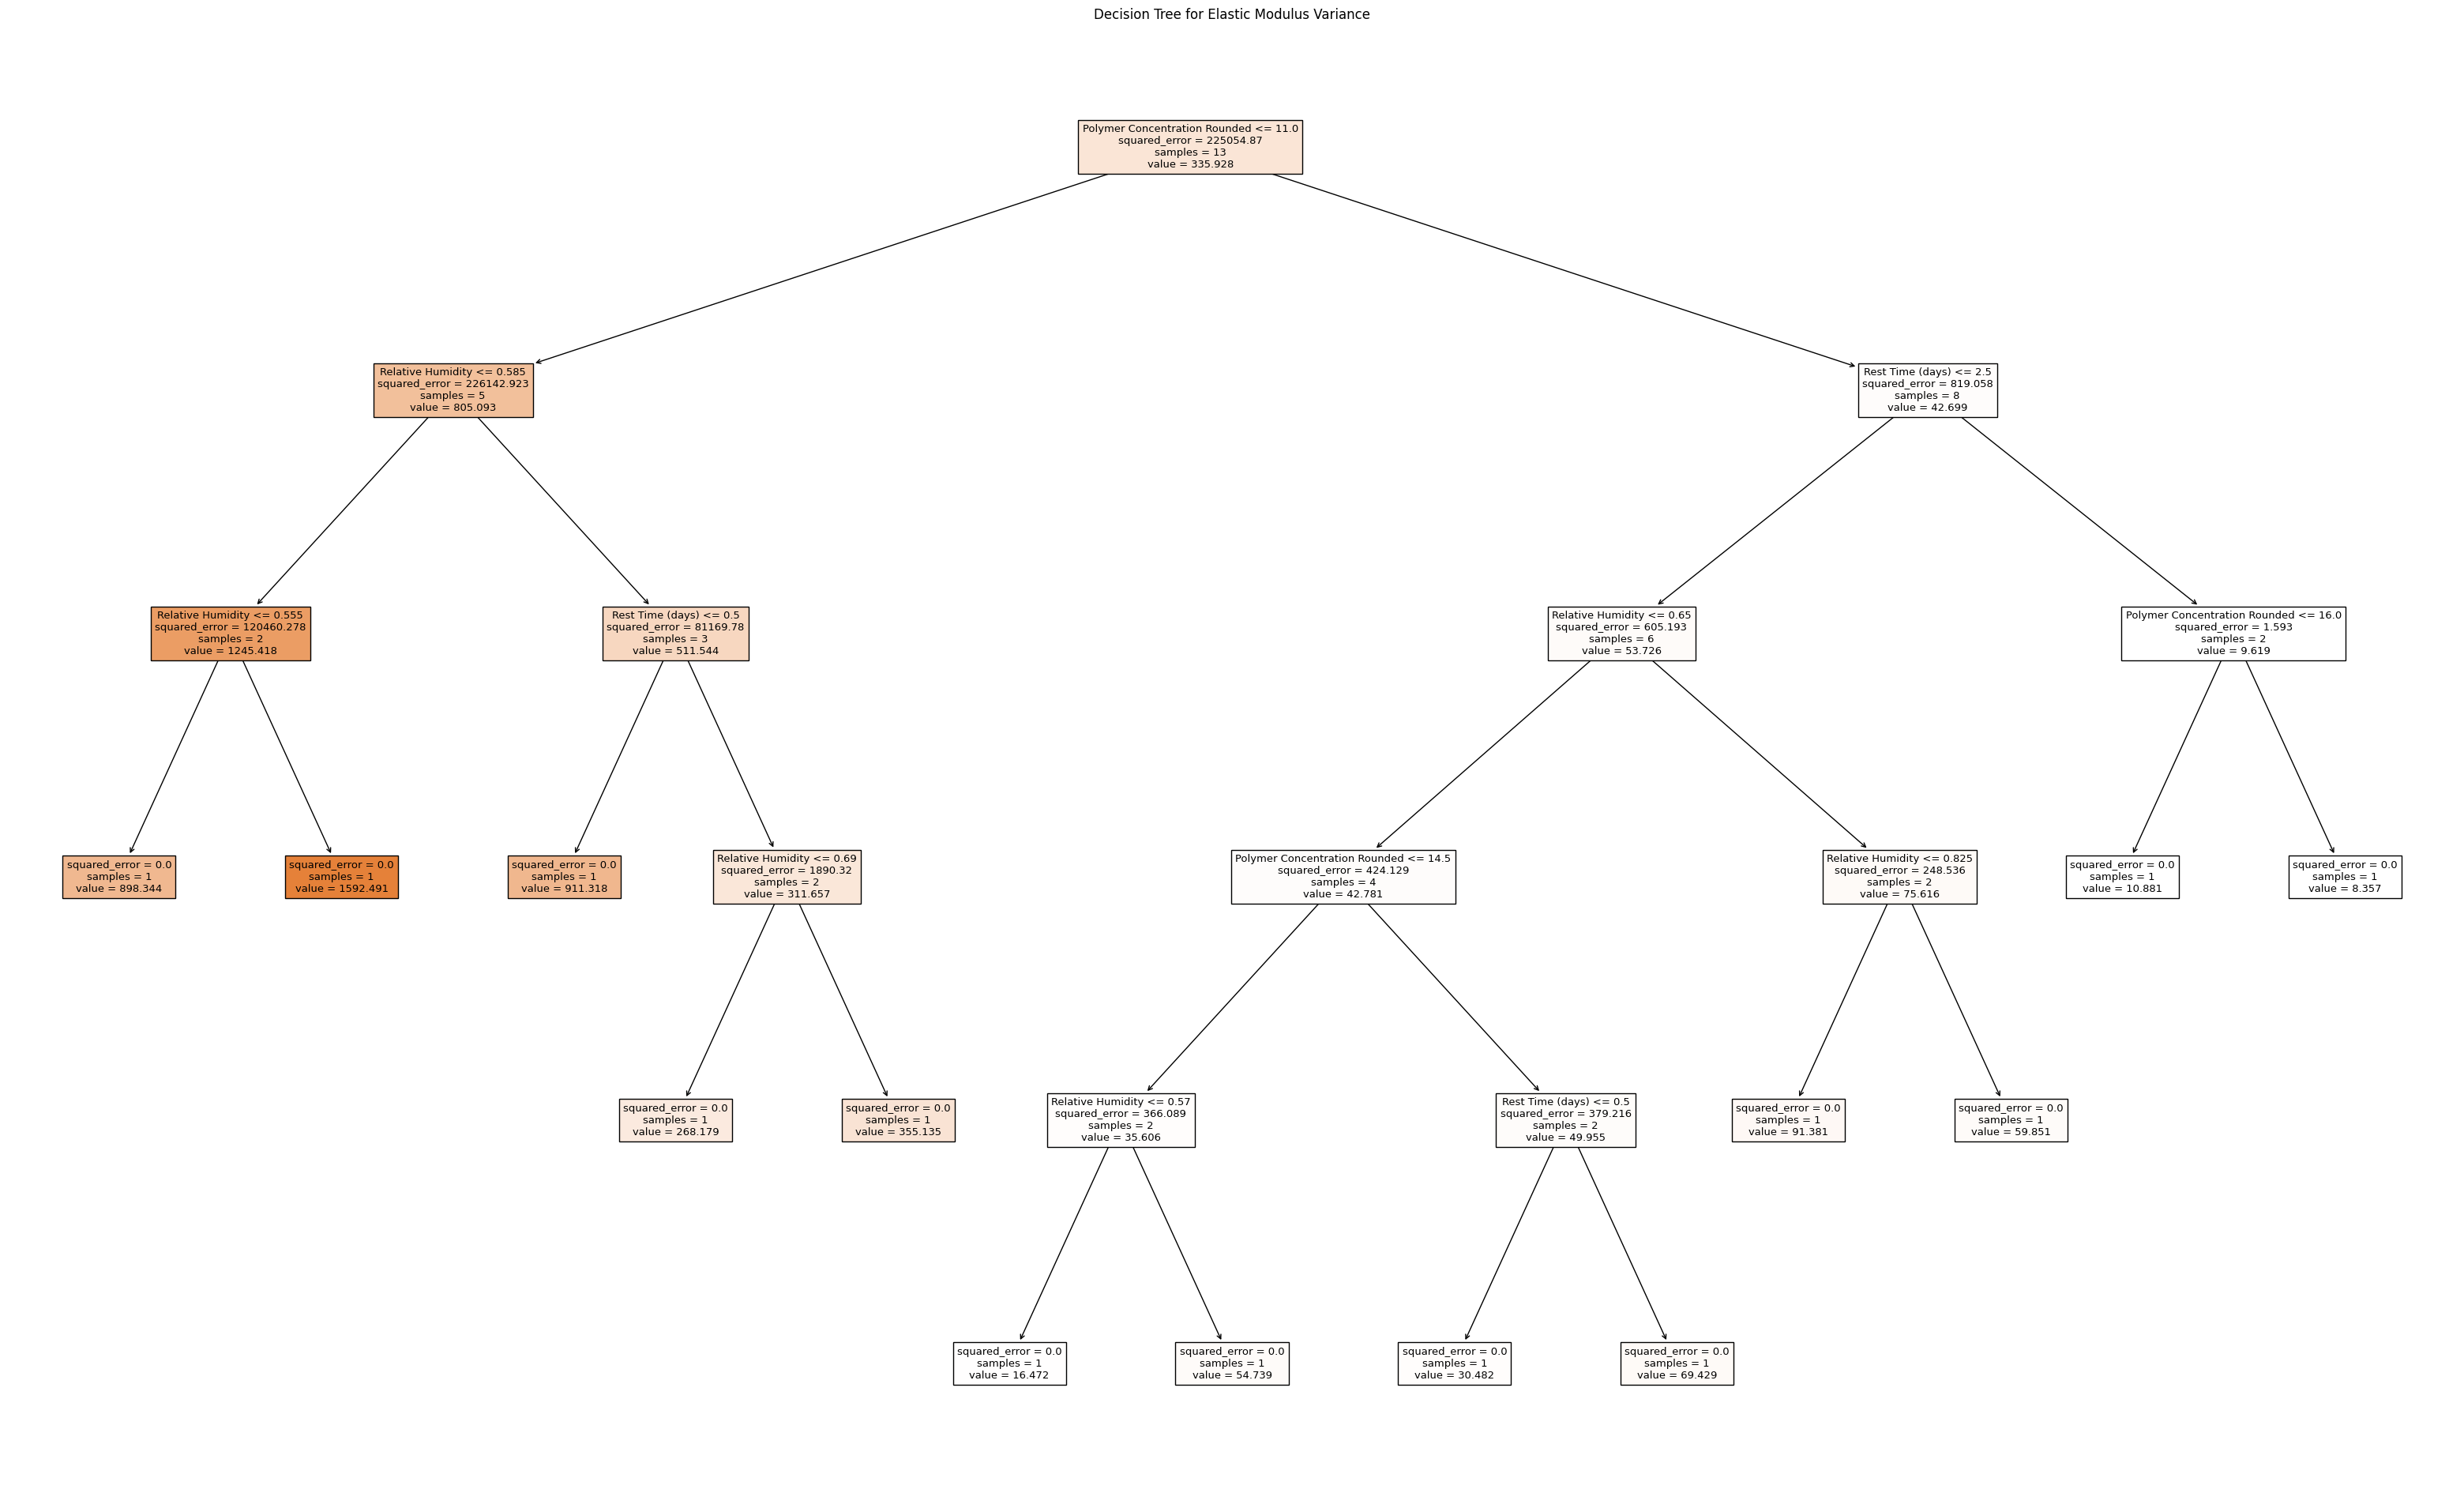

,Relative Humidity,Polymer Concentration Rounded,Rest Time (days),Elastic Modulus Variance
0,0.53,12,1,16.472470
1,0.53,17,1,69.428768
2,0.55,10,3,898.343712
3,0.56,10,2,1592.491470
4,0.59,15,4,10.881094
5,0.59,17,4,8.356847
6,0.61,10,0,911.317748
7,0.61,10,1,268.179156
8,0.61,12,1,54.739374
9,0.61,17,0,30.481838


In [12]:
# VARIANCE OF ELASTIC MODULUS TREE
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

combinedData = pd.read_csv('combinedData.csv')

# Group by the relevant features and calculate variance, then filter out groups with only one trial
grouped = combinedData.groupby(['Relative Humidity', 'Polymer Concentration Rounded', 'Rest Time (days)'])
variance_df = grouped['Elastic Modulus'].var().reset_index()
variance_df.columns = ['Relative Humidity', 'Polymer Concentration Rounded', 'Rest Time (days)', 'Elastic Modulus Variance']

# Filter out groups with only one trial
count_df = grouped.size().reset_index(name='count')
filtered_df = pd.merge(variance_df, count_df, on=['Relative Humidity', 'Polymer Concentration Rounded', 'Rest Time (days)'])
filtered_df = filtered_df[filtered_df['count'] > 1].drop(columns='count')

# Create a decision tree regressor
features = filtered_df[['Relative Humidity', 'Polymer Concentration Rounded', 'Rest Time (days)']]
target = filtered_df['Elastic Modulus Variance']
regressor = DecisionTreeRegressor()
regressor.fit(features, target)

# Plot the decision tree
plt.figure(figsize=(40, 24))
plot_tree(regressor, feature_names=features.columns, filled=True)
plt.title('Decision Tree for Elastic Modulus Variance')

#Save decision tree file
plt.savefig("decision_tree_for_elastic_modulus_variance.png")

plt.show()

# Display the filtered DataFrame with variance
filtered_df

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error: 1849.3320530868702


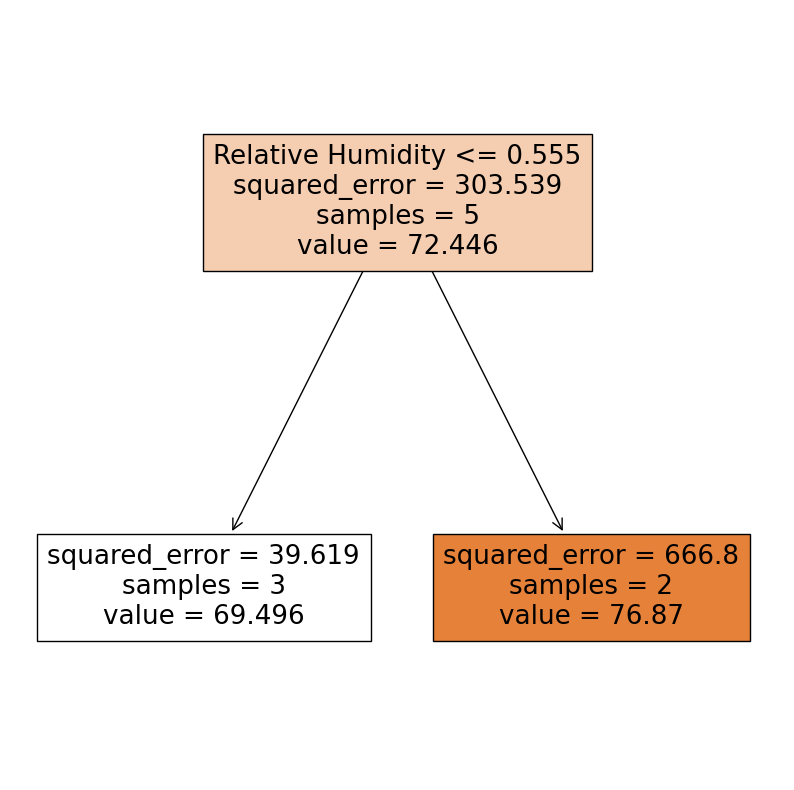

In [2]:
#CREATE TREE - 10wt% rounded [NOT USED/IMPORTANT]
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Corrected the DataFrame filtering logic
combinedData_10 = combinedData[(combinedData['Polymer Concentration Rounded'] == 10) & (combinedData['Fit'] == True)]

# Splitting features and target
X = combinedData_10.drop(['Date', 
                          'Sample', 
                          'Polymer Concentration Rounded', 
                          'Polymer Concentration Real', 
                          'Wrinkles', 
                          'Fitting Success',
                          'Results',
                          'R Squared',
                          'Observations',
                          'Solution production notes',
                          'Trial',
                          'Concentration',
                          'Heating',
                          'Thickness_y',
                          'Elastic Modulus',
                          'Yield Strength',
                          'Plateau Slope',
                          'Densification Slope',
                          'Changepoint',
                          'Fit'], axis=1)
y = combinedData_10['Elastic Modulus']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Using the best estimator found to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the tree of the best estimator
plt.figure(figsize=(10,10))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mean Squared Error: 146.6421576169445


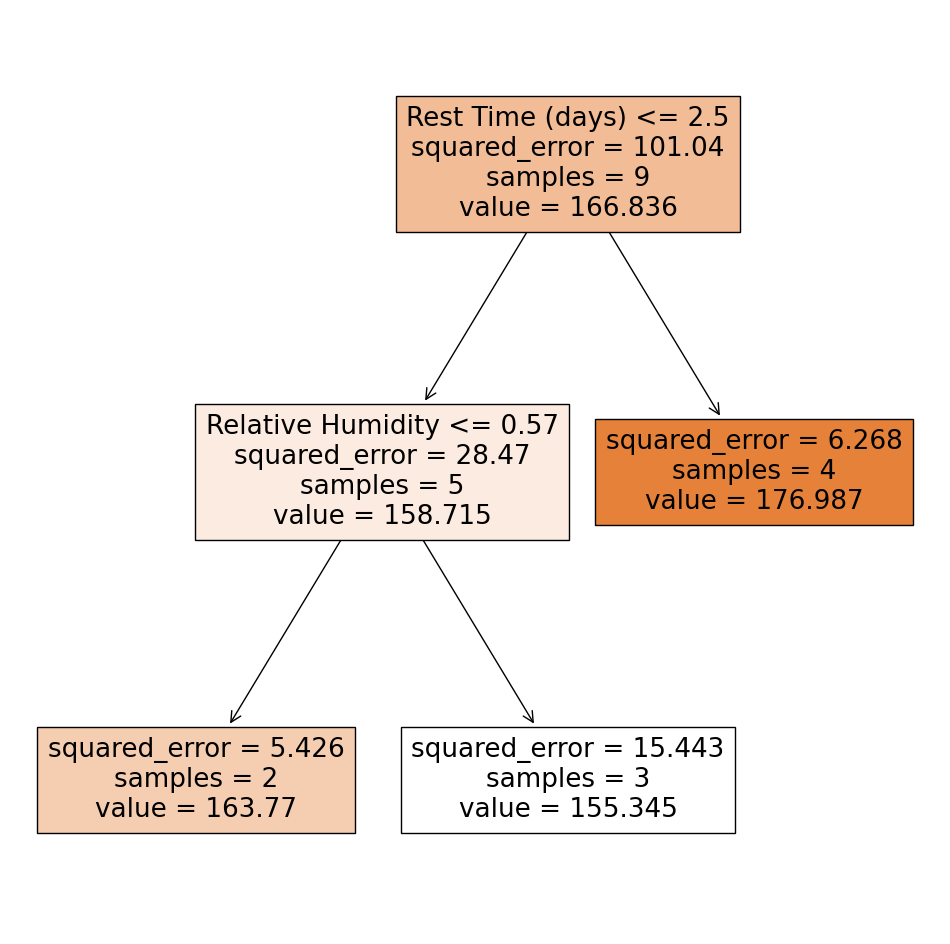

In [22]:
#CREATE TREE - 17wt% rounded [NOT USED/IMPORTANT]
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Corrected the DataFrame filtering logic
combinedData_17 = combinedData[(combinedData['Polymer Concentration Rounded'] == 17) & (combinedData['Fit'] == True)]

# Splitting features and target
X = combinedData_17.drop(['Date', 
                          'Sample', 
                          'Polymer Concentration Rounded', 
                          'Polymer Concentration Real', 
                          'Wrinkles', 
                          'Fitting Success',
                          'Results',
                          'R Squared',
                          'Observations',
                          'Solution production notes',
                          'Trial',
                          'Concentration',
                          'Heating',
                          'Thickness_y',
                          'Elastic Modulus',
                          'Yield Strength',
                          'Plateau Slope',
                          'Densification Slope',
                          'Changepoint',
                          'Fit'], axis=1)
y = combinedData_17['Elastic Modulus']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(tree_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Using the best estimator found to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the tree of the best estimator
plt.figure(figsize=(12,12))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, filled=True)
plt.show()

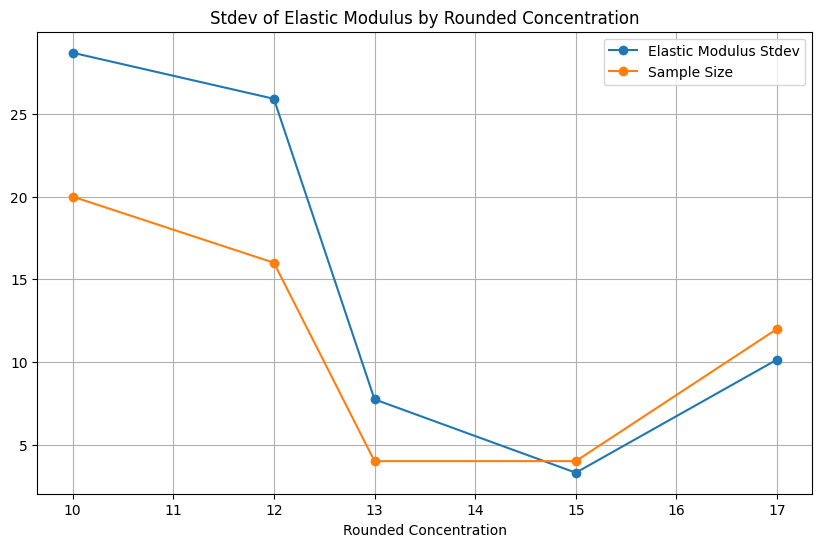

In [12]:
#INHERENT VARIANCE WITH CONCENTRATION [NOT USED/IMPORTANT]

concentration_std = combinedData.groupby('Polymer Concentration Rounded')['Elastic Modulus'].std()
concentration_std_df = concentration_std.reset_index()
concentration_std_df.columns = ['Polymer Concentration Rounded', 'Elastic Modulus Stdev']

sample_size = combinedData.groupby('Polymer Concentration Rounded').size()
sample_size_df = sample_size.reset_index()
sample_size_df.columns = ['Polymer Concentration Rounded', 'Sample Size']

plt.figure(figsize=(10, 6))
plt.plot(concentration_std_df['Polymer Concentration Rounded'], concentration_std_df['Elastic Modulus Stdev'], marker='o', label='Elastic Modulus Stdev')
plt.plot(sample_size_df['Polymer Concentration Rounded'], sample_size_df['Sample Size'], marker='o', label='Sample Size')
plt.title('Stdev of Elastic Modulus by Rounded Concentration')
plt.xlabel('Rounded Concentration')
plt.legend()
plt.grid(True)
plt.show()